# Time-series Stationarity

## Objectives

* Check and comment on the stationarity of time-series data 
* Use rolling statistics as an initial check for stationarity 
* USe Dickey Fuller Test for performing statistical testing for TS stationarity

## Introduction

A time-series is said to be stationary if its statistical properties such as mean, variance remain constant over time. 

Why is it important? Because most time-series models work on the assumption that **the time-series is stationary**. For general time-series datasets, if it shows a particular behaviour over time, there is a very high probability that it will follow a similar behaviour in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Although stationarity is defined using very strict criteria, for practical purposes we can assume the series to be stationary if it has following constant statistical properties over time:

> * **The mean of the series should not be a function of time rather should be a constant. The image below has the left hand graph satisfying the condition whereas the graph in red has a time dependent mean.**

![](Mean_nonstationary.png)

> * **The variance of the series should not a be a function of time. This property is known as homoscedasticity. Following graph depicts what is and what is not a stationary series. (Notice the varying spread of distribution in the right hand graph)**

![](Var_nonstationary.png)
> * **The covariance of the i th term and the (i + m) th term should not be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’ below.**

![](Cov_nonstationary.png)


## Check for Stationarity
Lets move onto the ways of testing stationarity. We shall work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset has been provided to you as `passengers.csv`

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pandas import Series
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
# Read the dataset 'passengers.csv' and view the head
data = pd.read_csv('passengers.csv')
data.head()

# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Set 'Month' column as the index of this dataset and change the month string to `datetime` object. 

In [3]:
# Set month column as index, change the datatype to datetime and check for the timeseries object
ts = data.set_index('Month')
ts.index = pd.to_datetime(ts.index)
ts.index


# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually incpect this time-series.

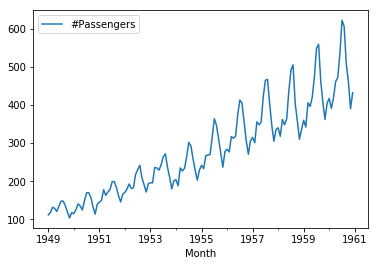

In [4]:
# Plot the time-series ts
ts.plot()

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences (we’ll see such cases later). So, more formally, we can check stationarity using the following two approaches:

### 1. Rolling Statistics 

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean **at any instant ‘t’, we can take the average/variance of the, say, one last year, i.e. last 12 months**. This is known as the **window size**. 

Pandas has a built in functions called [rolling( ) ](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html)to calculate these rolling statistics. 

In [8]:
#Determing rolling statistics
rolmean = ts.rolling(window=12).mean()
rolstd = ts.rolling(window=12).std()

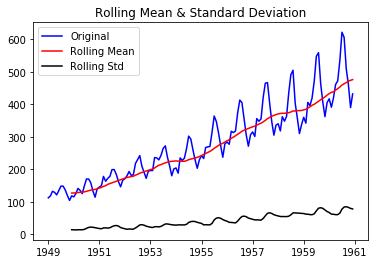

In [9]:
#Plot rolling statistics
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Though the variation in standard deviation is small, mean is clearly increasing with time and thus, this is not a stationary series. 

### 2. Dickey-Fuller Test 

This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. `statsmodels.tsa` has built in support for performing Dickey Fuller test and calculating the test statistic with `adfuller`. Further details on this can be viewed [HERE](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

In [11]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:


print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts['#Passengers'], autolag='AIC')

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)


# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Here, we can see that the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values. This confirms the non-stationarity of the time-series. Next we shall see how to remove non-stationary elements from the time-series and get it ready for predictive modelling. 

## Summary

In this lab, we learnt to check for the stationarity of a time-series object in python. We used rolling statistics, with rolling mean and rolling standrad deviation to check for trends and seasonal elements in a time-series. We also learnt how to use Dickey Fuller test to run statistical test on a time-series and check for its staionarity with a significance level. Following labs will further explore stationarity and how to ensure it. 